In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
#import warnings
#warnings.filterwanings('ignore')
%matplotlib inline

In [2]:
# loading data description
file = open("data_description.txt","r") 
print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
# loading data
df_train = pd.read_csv('train.csv')
print(len(df_train.columns))
print(df_train.columns)

81
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.columns[1:]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

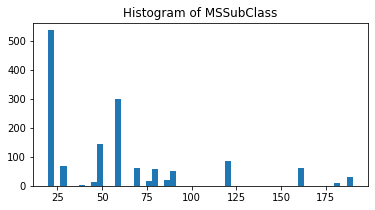

C:\Users\changsu.lee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\changsu.lee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


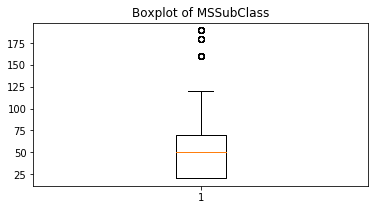

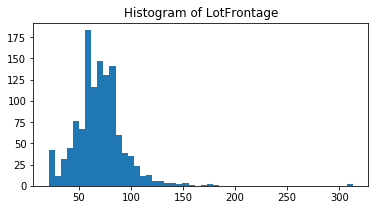

C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


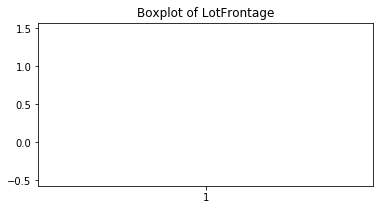

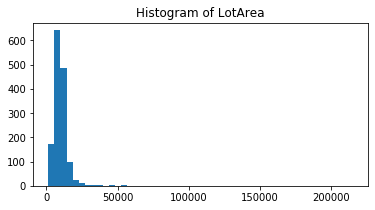

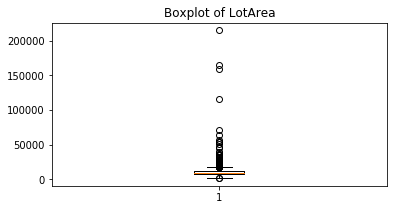

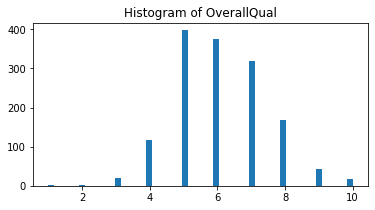

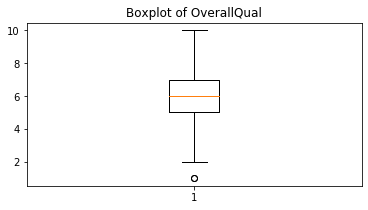

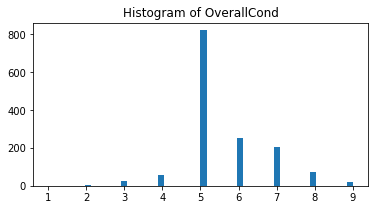

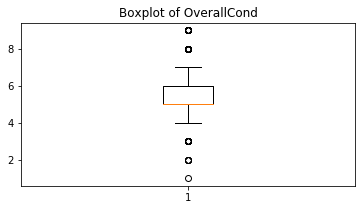

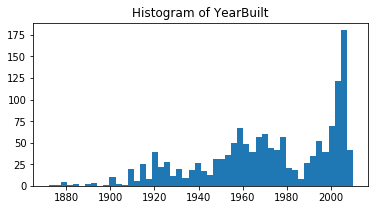

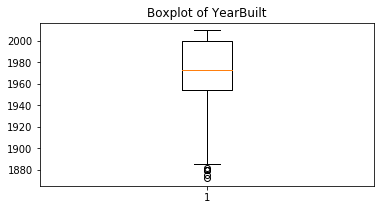

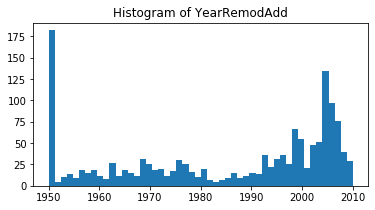

C:\Users\changsu.lee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\changsu.lee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


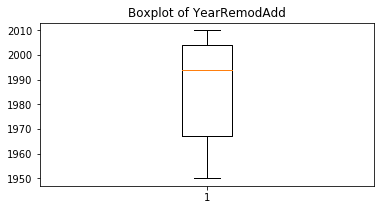

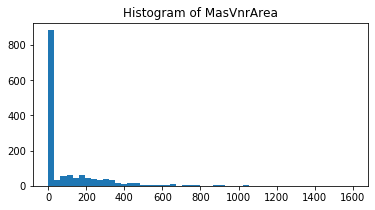

C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


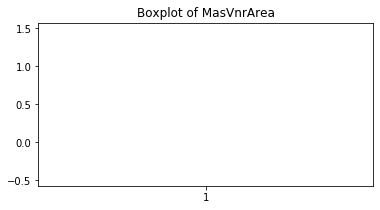

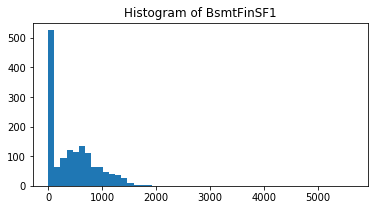

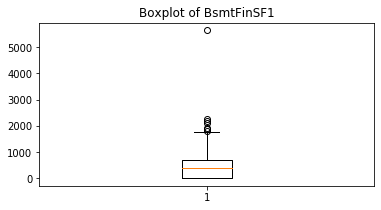

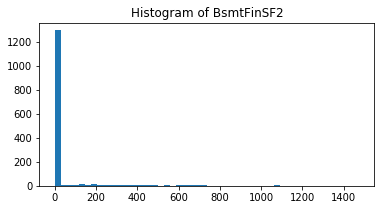

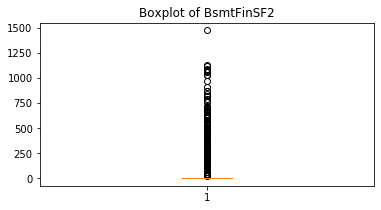

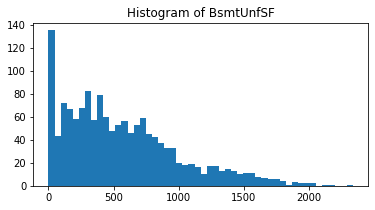

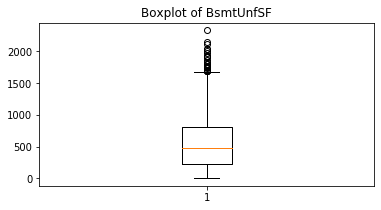

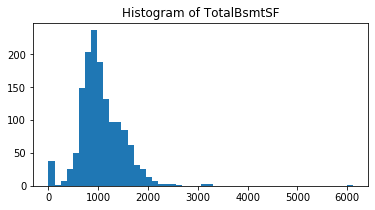

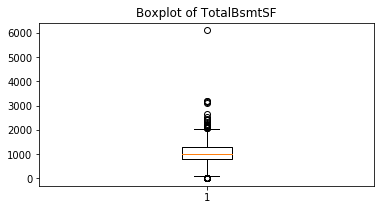

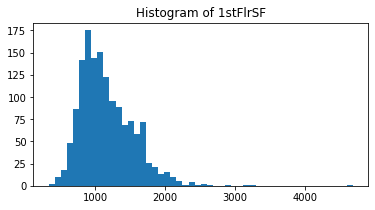

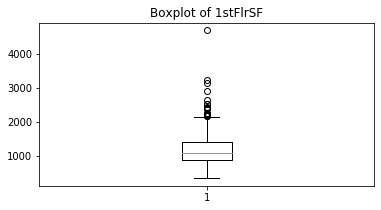

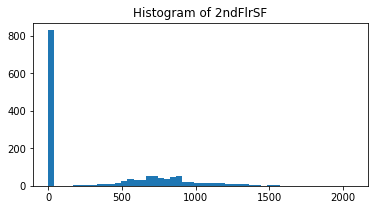

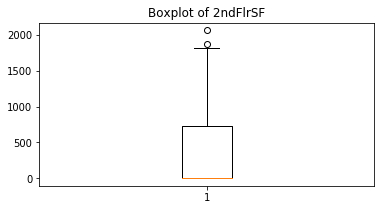

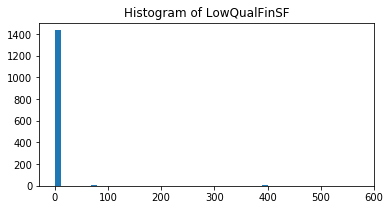

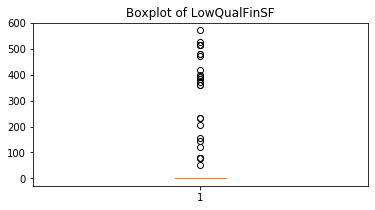

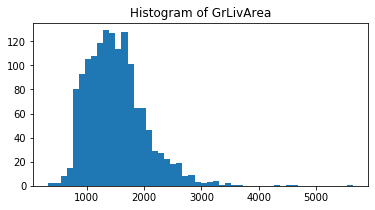

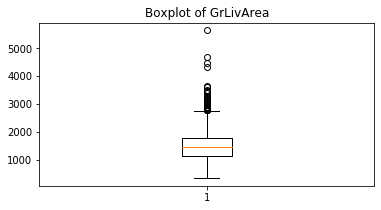

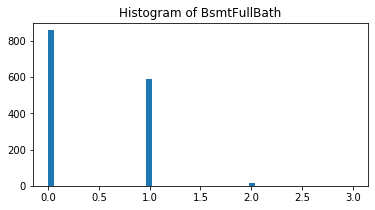

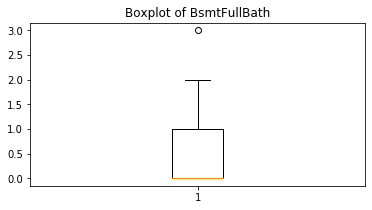

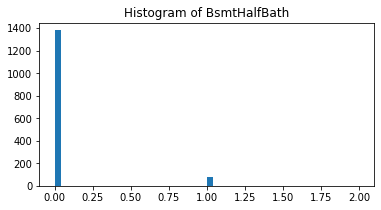

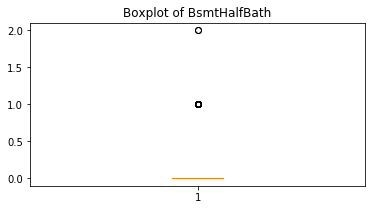

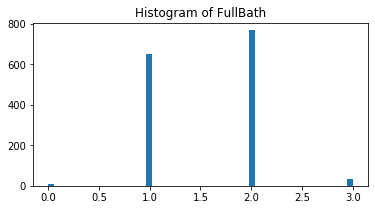

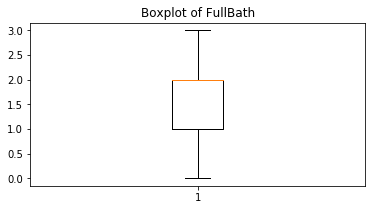

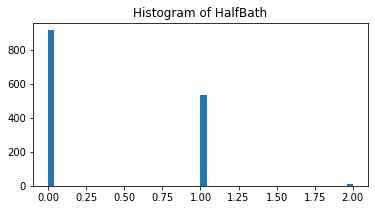

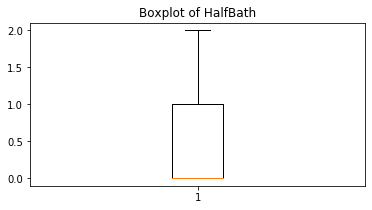

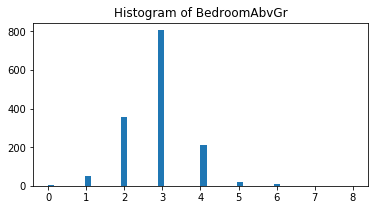

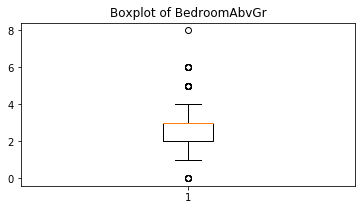

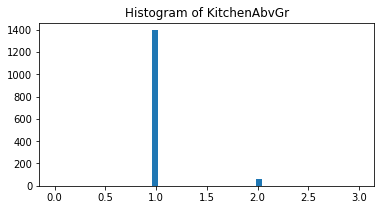

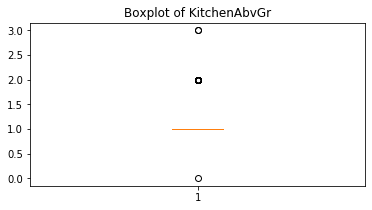

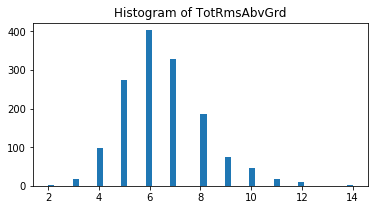

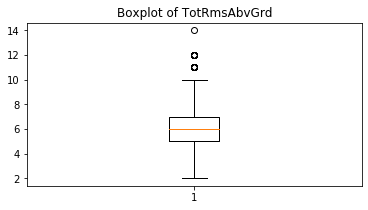

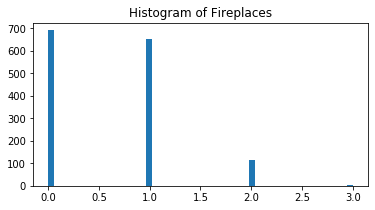

C:\Users\changsu.lee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\changsu.lee\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


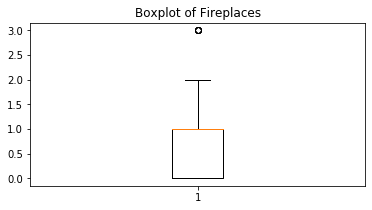

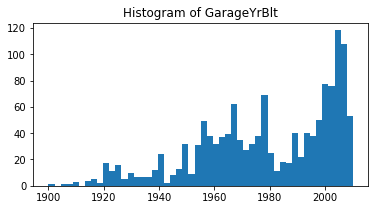

C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\changsu.lee\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


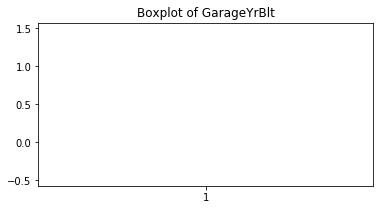

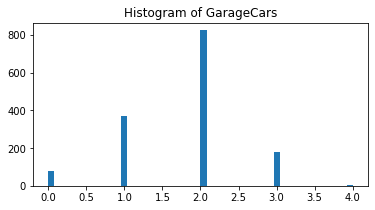

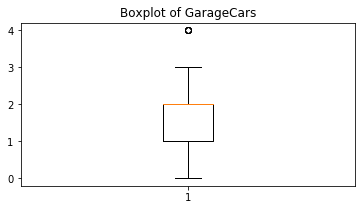

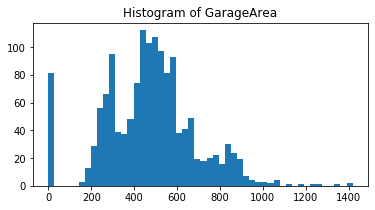

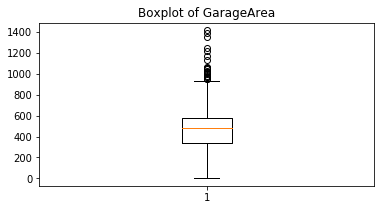

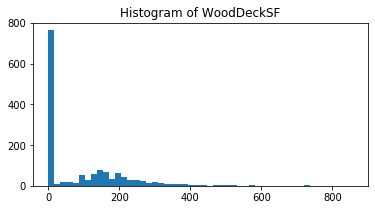

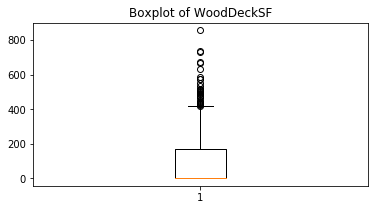

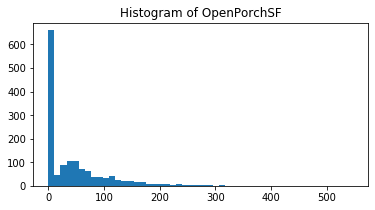

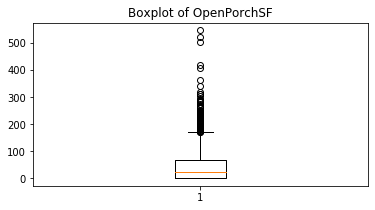

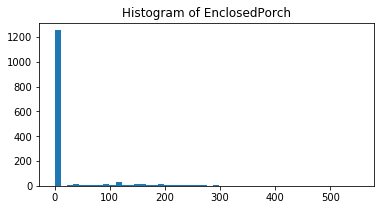

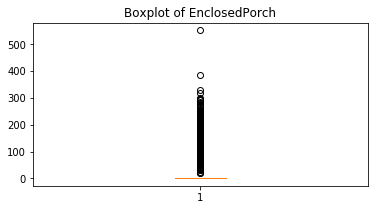

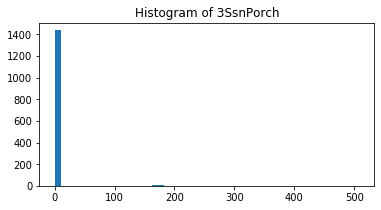

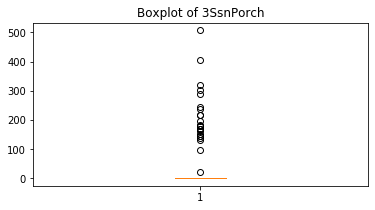

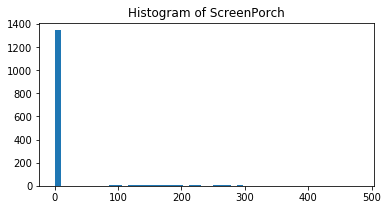

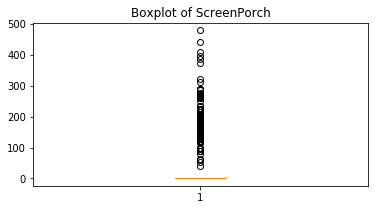

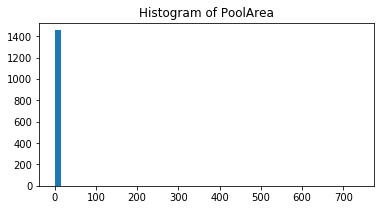

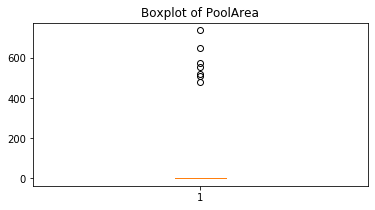

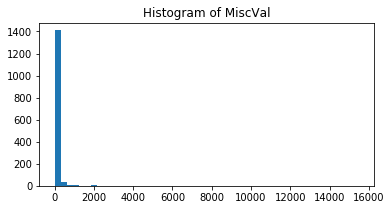

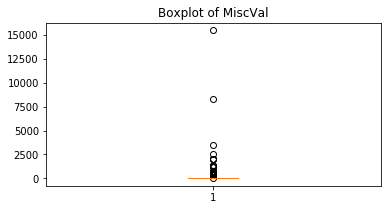

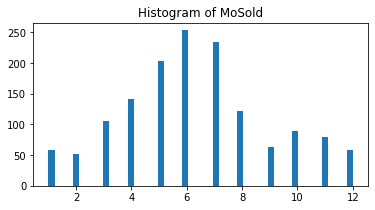

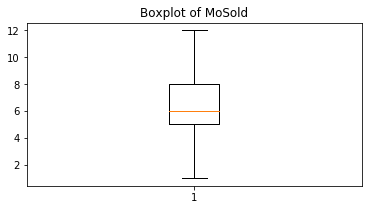

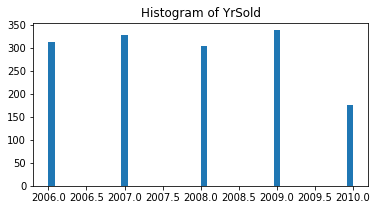

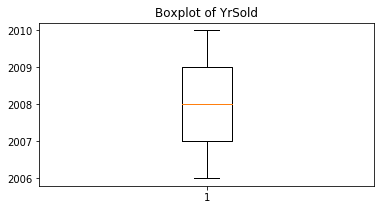

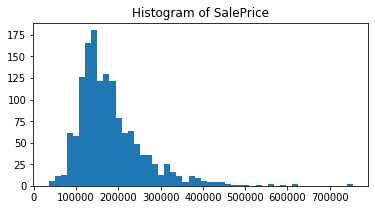

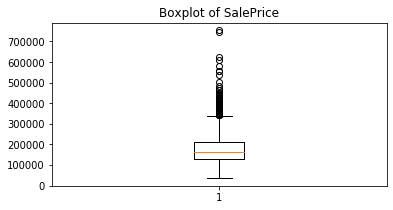

In [6]:
# histograms and boxplots

#plt.figure(figsize=(15, 15))

for column in df_train.columns[1:]:
    
    if df_train[column].dtypes == np.dtype('object'):
        continue
        
    bins_num = 50;
    #if df_train[column].dtypes == np.dtype('O'):
    #    bins_num = len(set(df_train[column]))

    plt.subplots(figsize=(6,3))
    plt.hist(df_train[column], bins=bins_num)
    title="Histogram of {}".format(column)
    plt.title(title, fontsize=12)
    plt.show()
    
    fig1, ax1 = plt.subplots(figsize=(6,3))
    ax1.set_title("Boxplot of {}".format(column))
    ax1.boxplot(df_train[column])

Skewness: 1.882876
Kurtosis: 6.536282


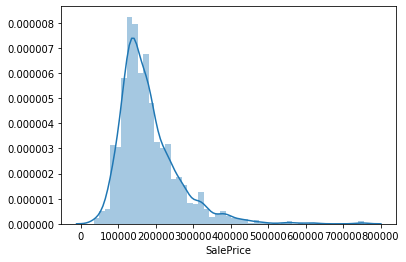

In [7]:
# exploring the target column, SalePrice in the training data
sns.distplot(df_train['SalePrice']);

#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

# In probability theory and statistics, 
# skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean, and
# - https://en.wikipedia.org/wiki/Skewness#/media/File:Relationship_between_mean_and_median_under_different_skewness.png
# - Positive, Symmetrical, Negative Skewness 
# kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable
# - The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; 
# - i.e., the outliers. Therefore, kurtosis measures outliers only; it measures nothing about the "peak".

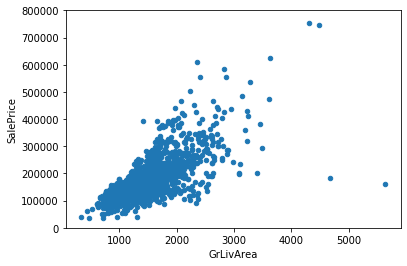

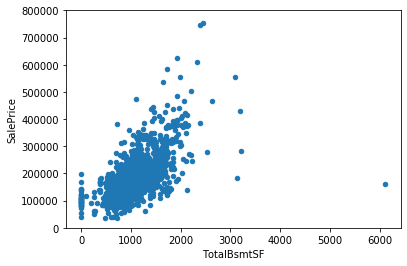

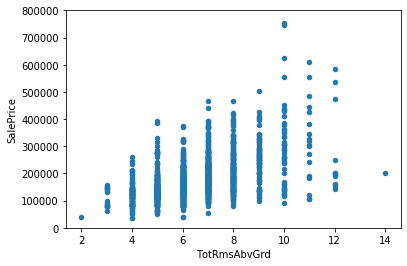

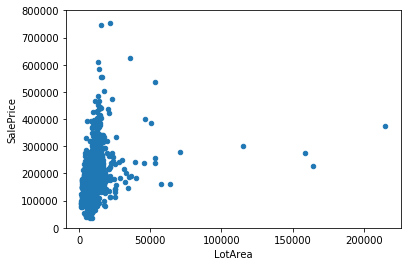

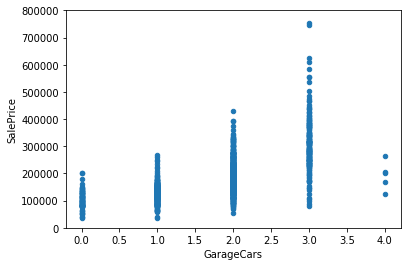

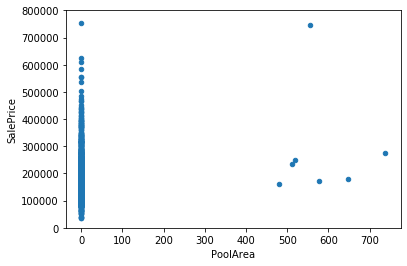

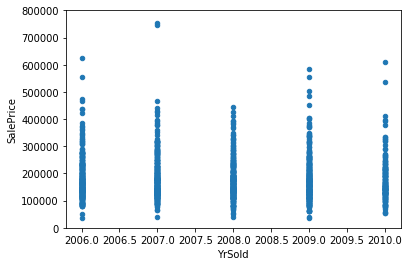

In [8]:
# Scatter Plots - Target Column's Relationship with numerical variables

numerical_colmns = ['GrLivArea', 'TotalBsmtSF', 'TotRmsAbvGrd','LotArea','GarageCars','PoolArea','YrSold']

for column in numerical_colmns:
    #scatter plot for given column vs saleprice
    data = pd.concat([df_train['SalePrice'], df_train[column]], axis=1)
    data.plot.scatter(x=column, y='SalePrice', ylim=(0,800000));


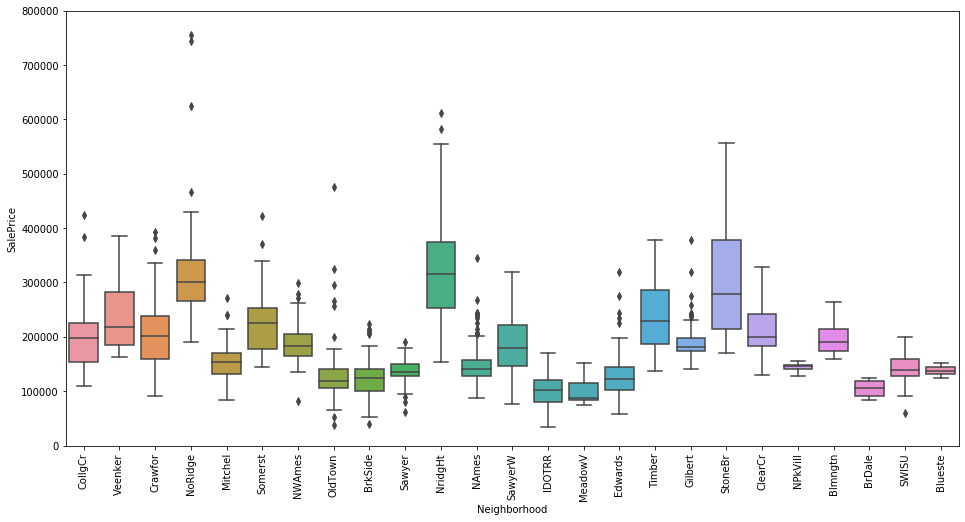

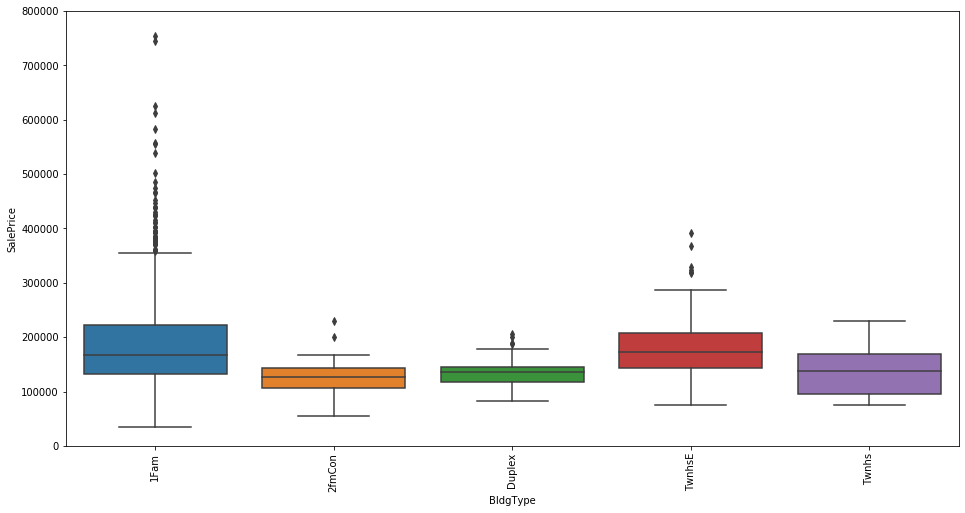

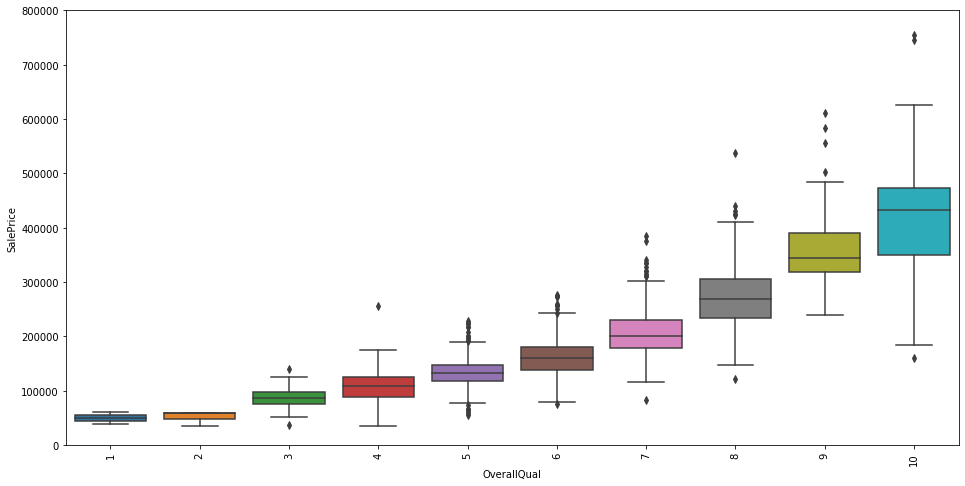

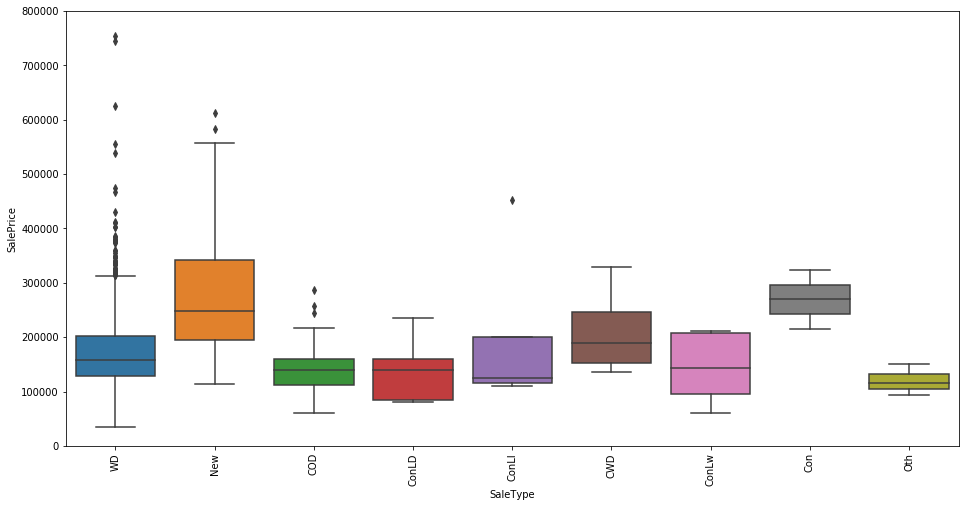

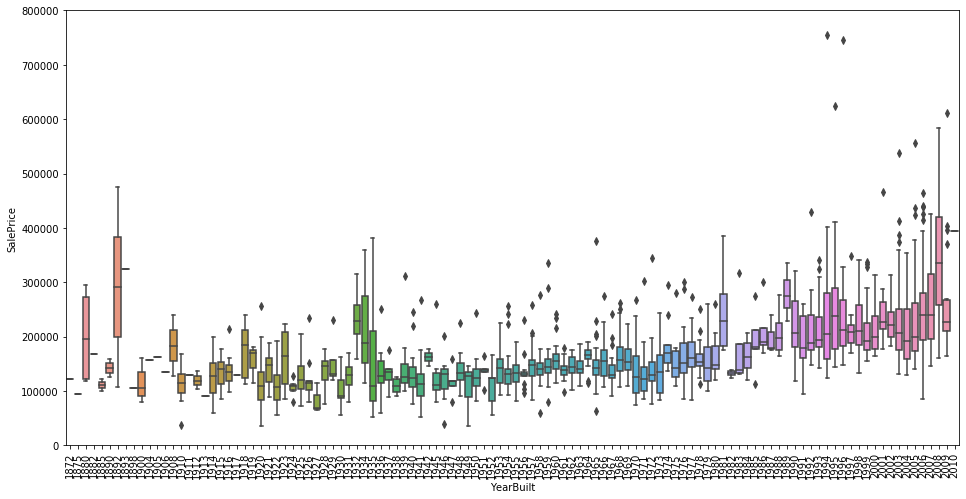

In [9]:
# Box plots - Target Column's Relationship with categorical variables

categorical_colmns = ['Neighborhood','BldgType','OverallQual','SaleType','YearBuilt']

for column in categorical_colmns:
    data = pd.concat([df_train['SalePrice'], df_train[column]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=column, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    plt.xticks(rotation=90)

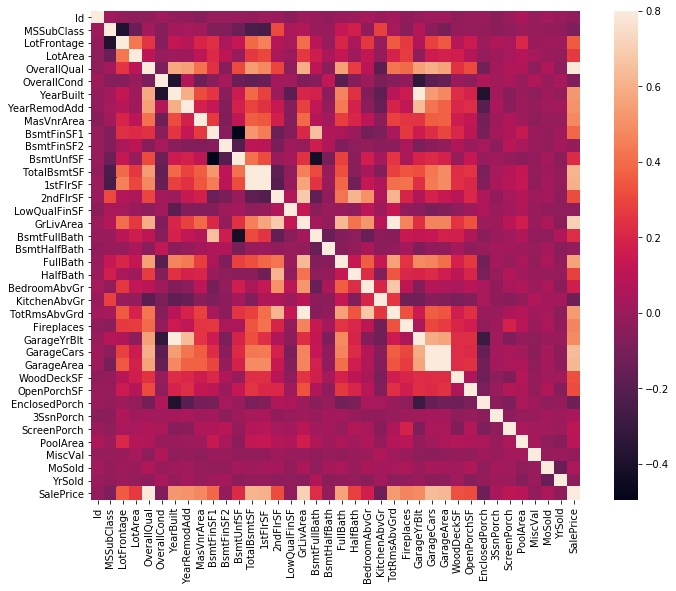

In [10]:
# Correlation matrix (heatmap style)

#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


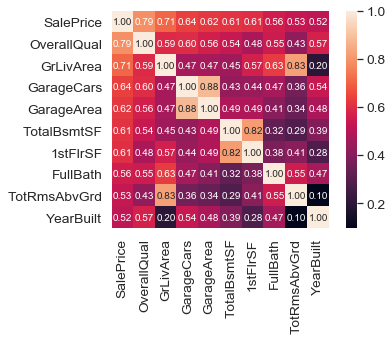

In [11]:
 # top 10 largest correlation efficients => top 10 highly correlated variables!
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

print(cols)

cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

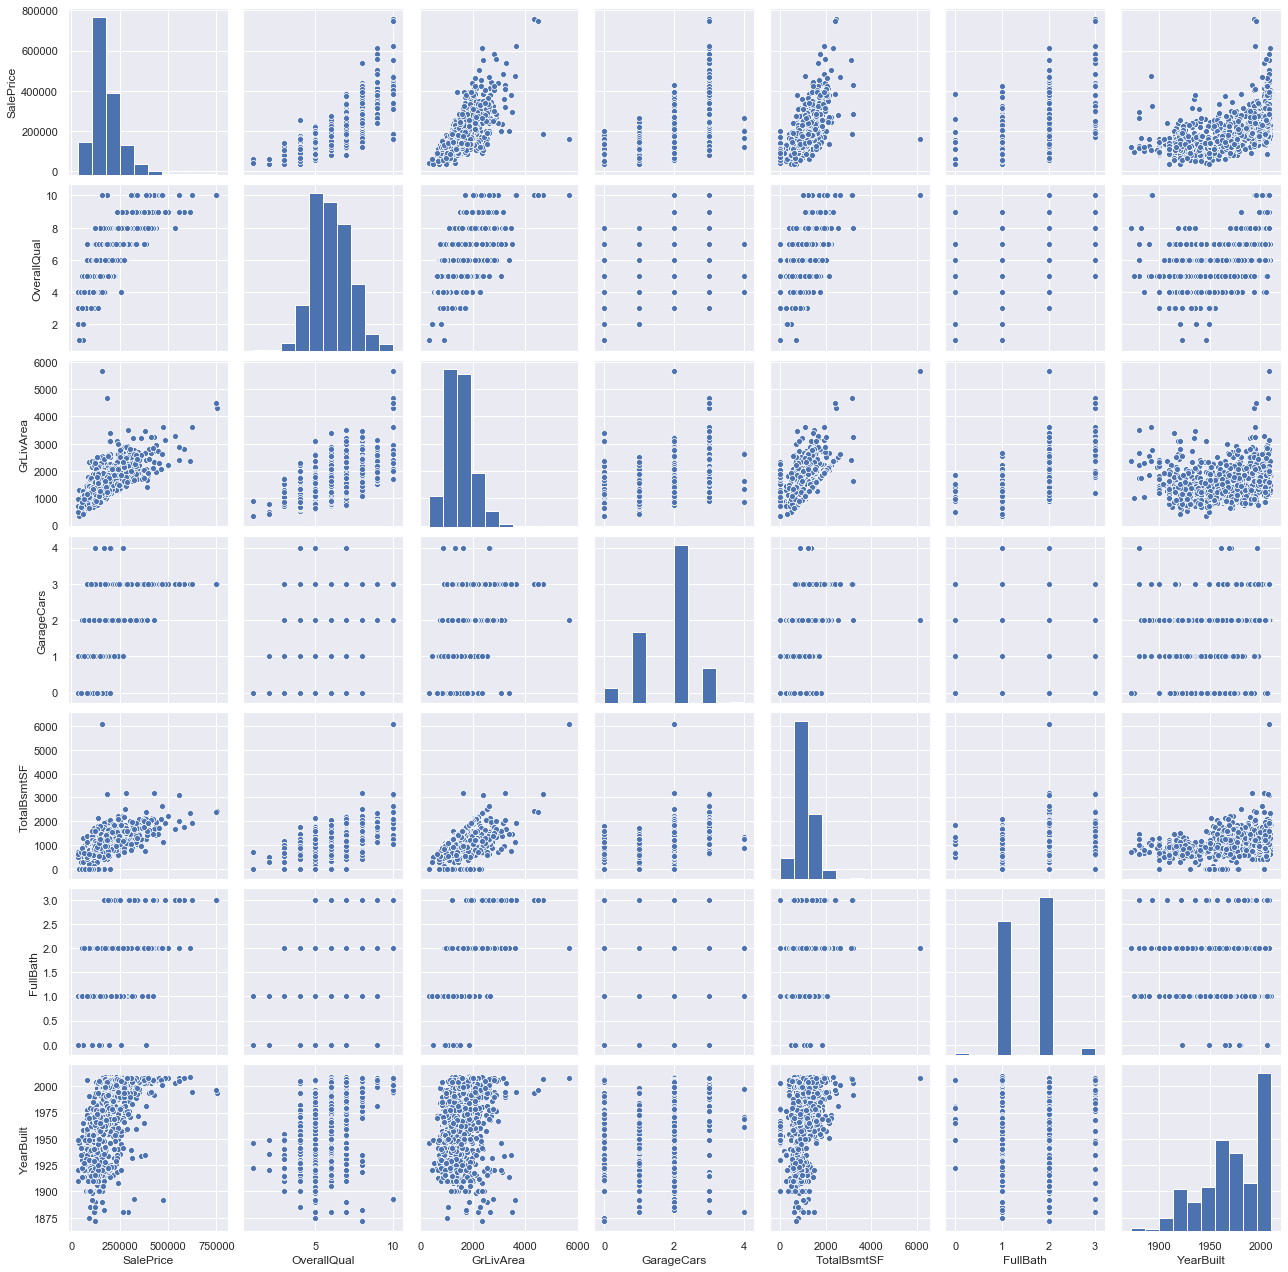

In [13]:
# Scatterplots with the top 7 highly correlated variables
# - GarageCars may be similar concept with the GarageArea 
# - TotalBsmtSF may be similar with the 1stFirSF
# - 'GrLivArea' may be similar with the 'TotRmsAbvGrd'

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

In [12]:
# missing - delete? OR data imputation?

# percentage of missing data for some variables
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [15]:
# It's obvious that the first 3 or 4 variables have more than 80% of missing data, 
#  so it may make sense to delete them.
# How about other variables then?

# Ref - https://medium.com/technofunnel/handling-missing-data-in-python-using-scikit-imputer-7607c8957740
#
# 1. Removing Rows With Missing Data
#  These could be scenarios of dropping the row:
#  - Drop all rows that have any NaN (missing) values.
#  - Drop only if the entire row has NaN (missing) values.
#  - Drop only if a row has more than two NaN (missing) values.
#  - Drop NaN (missing) in a specific column.
#
# 2. Replacing NaN With Data
#  - The value can be substituted by these values:
#  - The mean value of the other column values available in the training dataset.
#  - The median value of the other values available in the training dataset.
#  - Substitute with the most frequent value in the training dataset.
# 
# 3. SciKit’s Imputer Class - Imputer classes (https://scikit-learn.org/stable/modules/impute.html)
#  - SimpleImputer for a single variable, 
#  - IterativeImputer for multi-variables,
#  - KNNImputer for Nearest Neighbors imputation,
#
#  e.g. code snippets
#import pandas as pd
#
#dataFrame = pd.read_csv("Data.csv")
#trainingData = dataFrame.iloc[:, :].values
#dataset = dataFrame.iloc[:, :].values
#
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values="NaN", strategy="mean", axis = 0)
#imputer = imputer.fit(trainingData[:, 1:2])
#dataset[:, 1:2] = imputer.transform(dataset[:, 1:2])

In [ ]:
# noise filtering for outliers

In [ ]:
# PCA for dimentionality reduction